# Basic Neural Networks: Perceptron, MLP, Activation Functions, and Backpropagation

In this notebook, we will cover the following concepts of basic neural networks:
- **Perceptron**: The simplest neural network model for binary classification.
- **Multilayer Perceptron (MLP)**: A more powerful model with multiple layers.
- **Activation Functions**: Functions like ReLU, Sigmoid, and Softmax, which help the model learn non-linear relationships.
- **Backpropagation**: The algorithm that allows neural networks to learn by adjusting weights based on the error.

We'll use the **Iris dataset** for this exercise, a classic dataset in machine learning.


In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns


## 1. The Perceptron

A **Perceptron** is a binary classifier, which can only classify data into two classes. It is the simplest neural network with just one layer of neurons. The output is based on a weighted sum of inputs passed through an activation function.

### Perceptron Model:
The perceptron calculates the weighted sum of the inputs:

$$
y = f \left( \sum_{i=1}^n w_i x_i + b \right)
$$

Where:
- $x_i$ are the inputs,
- $w_i$ are the weights,
- $b$ is the bias term,
- $f$ is the activation function (often a step function).

The perceptron makes a decision by applying a threshold to the output:
- If $f(x) \geq 0$, the output is 1.
- If $f(x) < 0$, the output is 0.


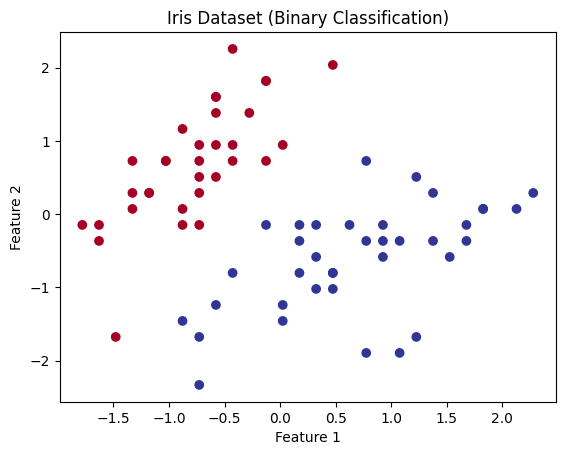

In [36]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# We will only use two classes (binary classification for simplicity)
X = X[y != 2]
y = y[y != 2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset (Binary Classification)')
plt.show()


### Perceptron Implementation

Now, let's implement the perceptron model. We'll define a simple perceptron class, train it on the Iris dataset, and visualize the decision boundary.

The perceptron learns the weights using the following update rule during training:

$$
w_i = w_i + \eta \times (y - \hat{y}) \times x_i
$$

Where:
- $w_i$ are the weights,
- $\eta$ is the learning rate,
- $y$ is the actual label,
- $\hat{y}$ is the predicted label,
- $x_i$ is the input feature.


C:\Users\BRC\AppData\Local\Temp\ipykernel_4308\3789575829.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.weights[0] += self.learning_rate * error  # Corrected line


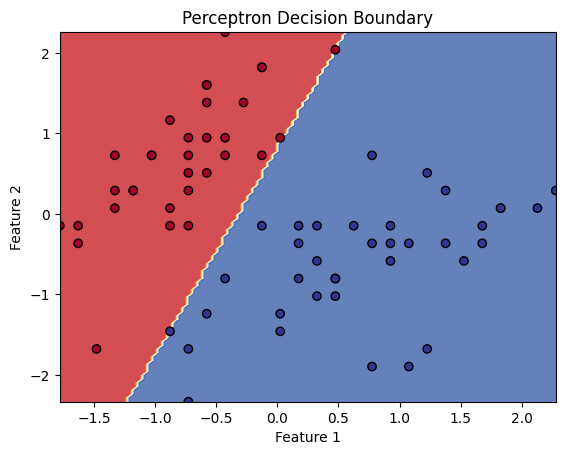

In [46]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_dim + 1)  # including bias term
    
    def activation(self, x):
        return 1 if x >= 0 else 0  # step function
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]  # weighted sum + bias
        return np.array([self.activation(x) for x in linear_output])
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i:i+1])
                error = y[i] - prediction
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error  # Corrected line

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# We will only use two classes (binary classification for simplicity)
X = X[y != 2]
y = y[y != 2]

# Select only the first two features for simplicity
X = X[:, :2]  # Use only the first two features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the perceptron
perceptron = Perceptron(input_dim=2)  # Now using 2 features
perceptron.train(X_train, y_train)

# Visualize the decision boundary for Perceptron
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

# Predict using the trained Perceptron model
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')
plt.title("Perceptron Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## 2. Multilayer Perceptron (MLP)

A **Multilayer Perceptron (MLP)** is a neural network that contains multiple layers of neurons. It consists of:
- An input layer (receiving the features),
- One or more hidden layers (which apply activation functions to introduce non-linearity),
- An output layer (producing the final prediction).

The architecture of an MLP allows it to learn complex patterns by learning a series of non-linear transformations.

We'll implement an MLP with one hidden layer, using ReLU activation in the hidden layer and Sigmoid activation in the output layer for binary classification.

### Model Architecture:
- **Input Layer**: Receives the features of the data.
- **Hidden Layer**: Computes non-linear transformations of the input.
- **Output Layer**: Produces the predicted probabilities for each class.


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MLP:
    def __init__(self, input_dim, hidden_dim, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_dim = hidden_dim
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.weights_hidden_output = np.random.randn(hidden_dim)
        self.bias_hidden = np.zeros(hidden_dim)
        self.bias_output = np.zeros(1)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        return self.output
    
    def backward(self, X, y):
        # Compute the error at the output layer
        output_error = self.output - y  # Shape: (N, 1)
        
        # Reshape output_error to (N, 1) if it is a flat array
        if output_error.ndim == 1:
            output_error = output_error[:, np.newaxis]

        # Compute the error at the hidden layer (derivative of ReLU)
        hidden_error = output_error * self.weights_hidden_output * (self.hidden_output > 0)  # Element-wise multiplication

        # Update weights and biases using gradient descent
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_error).flatten()  # Shape: (hidden_dim,)
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_error)  # Shape: (input_dim, hidden_dim)
        self.bias_hidden -= self.learning_rate * hidden_error.mean(axis=0)  # Shape: (hidden_dim,)
        self.bias_output -= self.learning_rate * output_error.mean(axis=0)  # Shape: (1,)
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            self.forward(X)
            self.backward(X, y)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# We will only use two classes (binary classification for simplicity)
X = X[y != 2]
y = y[y != 2]

# Select only the first two features for simplicity
X = X[:, :2]  # Use only the first two features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the MLP
mlp = MLP(input_dim=2, hidden_dim=5)
mlp.train(X_train, y_train)

# Test the MLP
mlp_predictions = mlp.forward(X_test)
mlp_predictions = np.round(mlp_predictions)  # Binary classification (round to 0 or 1)
mlp_accuracy = np.mean(mlp_predictions.flatten() == y_test)
print(f"Accuracy of MLP: {mlp_accuracy * 100:.2f}%")


Accuracy of MLP: 100.00%


### Visualizing the MLP Decision Boundary

Now, let's visualize the decision boundary learned by the MLP model.


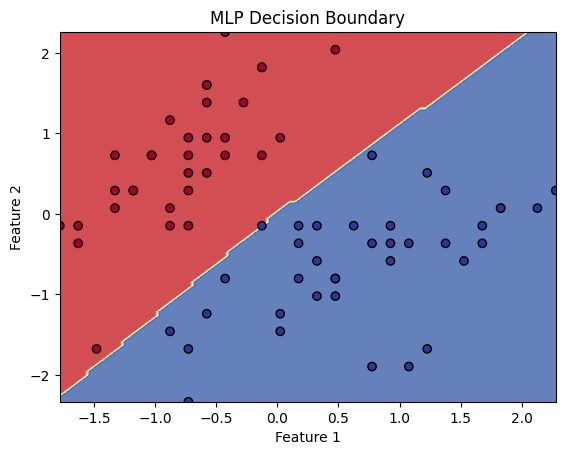

In [55]:
# Visualize the decision boundary for MLP
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))

Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')
plt.title("MLP Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## 3. Activation Functions

Activation functions allow neural networks to learn complex patterns by introducing non-linearity. Here are the commonly used activation functions:

### ReLU (Rectified Linear Unit)

The ReLU function is widely used in hidden layers of MLPs. It is defined as:

$$
f(x) = \max(0, x)
$$

It outputs $0$ for negative values and the input value for positive values.

### Sigmoid Function

The Sigmoid function is often used in the output layer for binary classification. It maps any input to a value between 0 and 1:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

### Softmax Function

For multi-class classification, the softmax function is used in the output layer to convert the raw output into a probability distribution:

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^k e^{x_j}}
$$


## 4. Backpropagation

Backpropagation is the algorithm that allows neural networks to learn by adjusting weights in the network based on the error. The process involves:
1. Forward pass: Calculate the output based on the current weights.
2. Calculate error: Measure the difference between the predicted output and actual output.
3. Backward pass: Propagate the error backward through the network, updating the weights using gradient descent.

The weights are updated using the following formula:

$$
w = w - \eta \times \frac{\partial E}{\partial w}
$$

Where:
- $w$ is the weight,
- $\eta$ is the learning rate,
- $E$ is the error (loss function).


## 5. Performance Evaluation

Let's evaluate the performance of our models (Perceptron and MLP) using the confusion matrix and accuracy score.


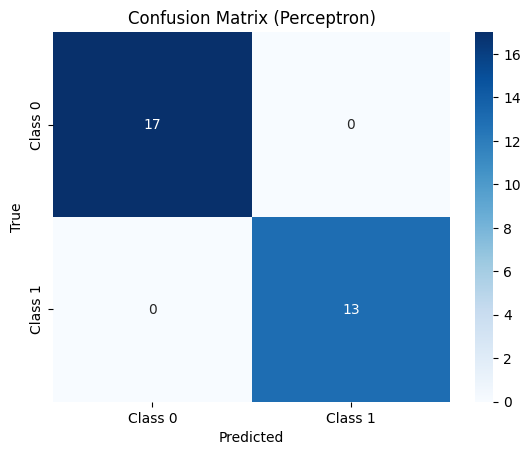

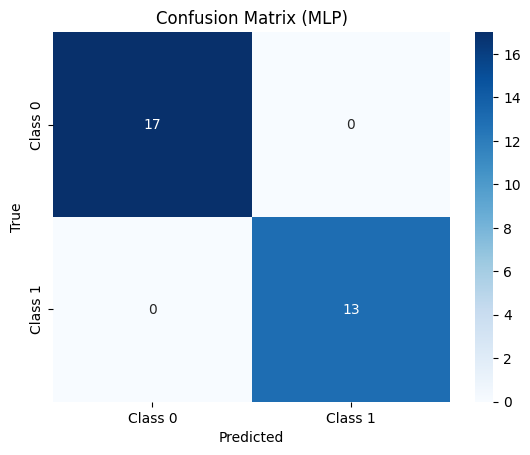

In [56]:
# Confusion matrix for Perceptron
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Perceptron)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion matrix for MLP
conf_matrix_mlp = confusion_matrix(y_test, mlp_predictions.flatten())
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (MLP)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Multi-Layer Perceptron (MLP) for Multi-Class Classification on the Wine Dataset

We'll implement a Multi-Layer Perceptron (MLP) from scratch to classify the **Wine dataset** into three categories. The dataset has 13 features and 3 possible target classes. The MLP will use a **ReLU activation function** for the hidden layer and a **softmax activation function** for the output layer.

We will:
1. Load and preprocess the Wine dataset.
2. Implement the MLP model.
3. Train the model on the dataset.
4. Visualize the results.


In [58]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


## 1. Load and Preprocess the Wine Dataset

First, we will load the Wine dataset using `sklearn`. We'll split the dataset into training and testing sets, and standardize the features to improve the convergence of the neural network during training.


In [59]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 2. Implementing the Multi-Layer Perceptron (MLP)

We will define a simple MLP class that includes:
- **ReLU** activation for the hidden layer.
- **Softmax** activation for the output layer (for multi-class classification).
- **Backpropagation** for training the network using gradient descent.


In [60]:
class MLP:
    def __init__(self, input_dim, hidden_dim, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_dim = hidden_dim
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.weights_hidden_output = np.random.randn(hidden_dim, 3)  # 3 classes in Wine dataset
        self.bias_hidden = np.zeros(hidden_dim)
        self.bias_output = np.zeros(3)  # 3 classes in output
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.relu(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_input)
        return self.output
    
    def backward(self, X, y):
        # One-hot encode the labels
        y_onehot = np.zeros((y.shape[0], 3))
        y_onehot[np.arange(y.shape[0]), y] = 1
        
        # Compute the error at the output layer
        output_error = self.output - y_onehot  # Shape: (N, 3)
        
        # Compute the error at the hidden layer (derivative of ReLU)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * (self.hidden_output > 0)  # Element-wise multiplication

        # Update weights and biases using gradient descent
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_error)  # Shape: (hidden_dim, 3)
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_error)  # Shape: (input_dim, hidden_dim)
        self.bias_hidden -= self.learning_rate * hidden_error.mean(axis=0)  # Shape: (hidden_dim,)
        self.bias_output -= self.learning_rate * output_error.mean(axis=0)  # Shape: (3,)
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            self.forward(X)
            self.backward(X, y)


## 3. Train the MLP Model

Now, we will instantiate the MLP class and train it on the Wine dataset. The model will be trained for 100 epochs with 10 hidden neurons.


In [61]:
# Train the MLP
mlp = MLP(input_dim=X_train.shape[1], hidden_dim=10)  # 10 hidden units
mlp.train(X_train, y_train)


## 4. Evaluate the Model

After training, we will evaluate the model's performance on the test set and visualize the predictions. We will calculate the accuracy of the model and print it.


In [62]:
# Test the MLP
mlp_predictions = mlp.forward(X_test)
mlp_predictions = np.argmax(mlp_predictions, axis=1)  # Get the class with highest probability
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print(f"Accuracy of MLP on the Wine dataset: {mlp_accuracy * 100:.2f}%")


Accuracy of MLP on the Wine dataset: 98.15%


## 5. Visualizing the Results

Since we have a multi-dimensional feature space (13 features), it's hard to visualize the decision boundaries directly. However, we can use **Principal Component Analysis (PCA)** to reduce the dimensions to 2D for visualization. 

We'll also plot the predictions on a 2D scatter plot with color-coded classes.


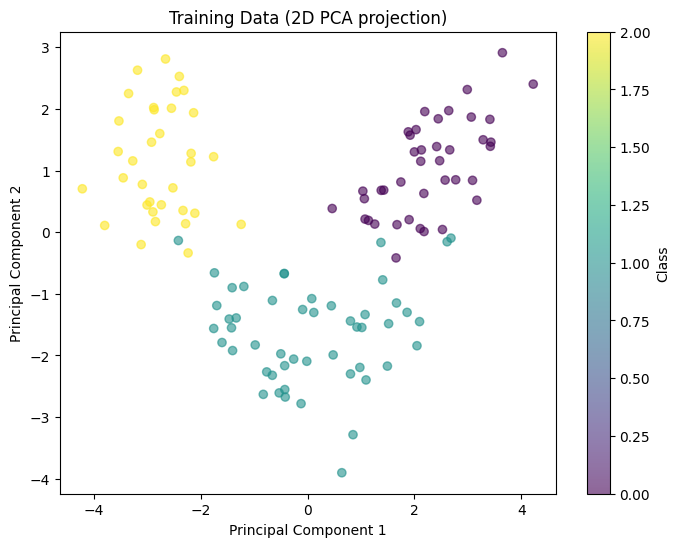

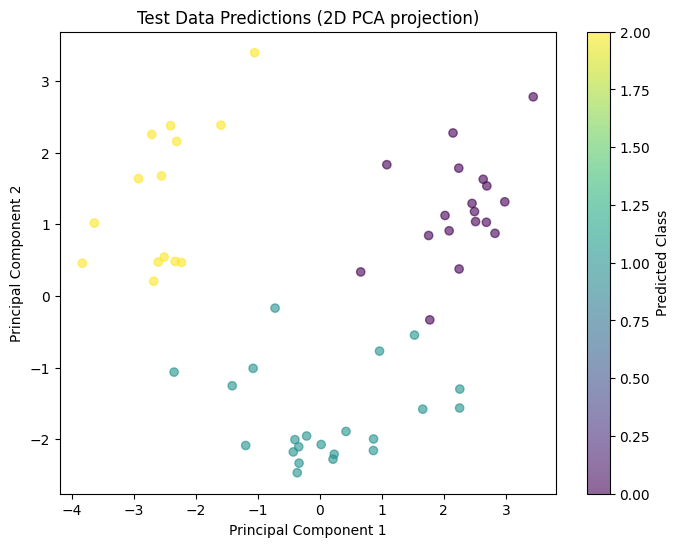

In [63]:
from sklearn.decomposition import PCA

# Reduce the features to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Visualize the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', marker='o', alpha=0.6)
plt.title("Training Data (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class')
plt.show()

# Visualize the predictions on test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=mlp_predictions, cmap='viridis', marker='o', alpha=0.6)
plt.title("Test Data Predictions (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Predicted Class')
plt.show()


### Key Takeaways:

- **Model Training**: We implemented a Multi-Layer Perceptron (MLP) with one hidden layer to classify the Wine dataset into three classes.
- **Evaluation**: After training, we tested the model on the test set and calculated the accuracy.
- **Visualization**: We used PCA to reduce the dimensionality of the dataset for visualization, allowing us to see how well the MLP has classified the data points.

